In [1]:
from PIL import Image 
import numpy as np
from matplotlib import pyplot as plt

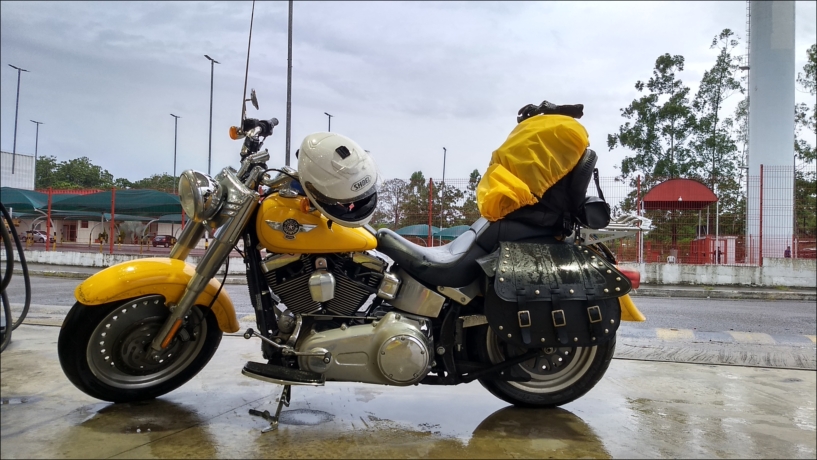

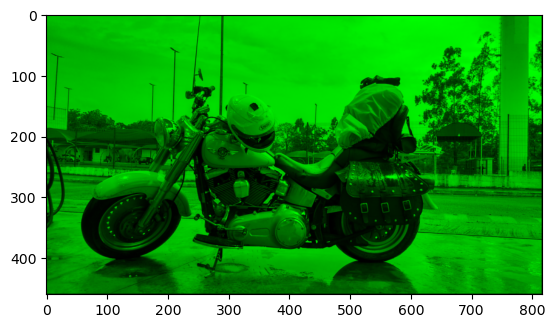

In [2]:
moto = Image.open("download.png")
display(moto)
moto.convert('RGB')
matrizImagem = np.array(moto)
matrizImagemR = np.copy(matrizImagem)
matrizImagemG = np.copy(matrizImagem)
matrizImagemB = np.copy(matrizImagem)

for colunaIndice in range(matrizImagem.shape[0]):
    coluna = matrizImagem[colunaIndice]
    for pixelIndice in range(coluna.shape[0]):
        matrizImagemR[colunaIndice][pixelIndice][1] = 0
        matrizImagemR[colunaIndice][pixelIndice][2] = 0
        matrizImagemG[colunaIndice][pixelIndice][0] = 0
        matrizImagemG[colunaIndice][pixelIndice][2] = 0
        matrizImagemB[colunaIndice][pixelIndice][0] = 0
        matrizImagemB[colunaIndice][pixelIndice][1] = 0

plt.imshow(matrizImagemR)
plt.imshow(matrizImagemG)
plt.imshow(matrizImagemB)
plt.show()


In [3]:
#contadorColuna = 0
#for coluna in matrizImagem:
#    vetorPixelR = np.zeros(3)
#    vetorPixelG = np.zeros(3)
#    vetorPixelB = np.zeros(3)
#    contadorPixel = 0
#    for pixel in coluna:
#        if contadorPixel == 0:
#            vetorPixelR[0] = pixel[0]
#            colunaR = np.array(vetorPixelR)
#            vetorPixelG[1] = pixel[1]
#            colunaG = np.array(vetorPixelG)
#            vetorPixelB[2] = pixel[2]
#            colunaB = np.array(vetorPixelB)
#        else:
#            vetorPixelR[0] = pixel[0]
#            colunaR = np.vstack((colunaR, vetorPixelR))
#            vetorPixelG[1] = pixel[1]
#            np.vstack((colunaG, vetorPixelG))
#            vetorPixelB[2] = pixel[2]
#            np.vstack((colunaB, vetorPixelB))
#        contadorPixel = 1
#    if contadorColuna == 0:
#        matrizImagemR = [colunaR]
        #print(f'matrizImagemR inicial: {matrizImagemR}')
#        matrizImagemG = [colunaG]
#        matrizImagemB = [colunaB]
#    else:
#        matrizImagemR.append([colunaR])
#        matrizImagemG.append([colunaG])
#        matrizImagemB.append([colunaB])
#    contadorColuna = 1
#print(f'matrizImgR antes da conversao: {matrizImagemR}')
#matrizImagemR = np.array(matrizImagemR, dtype=object,)
#print(f'dimensao matrizImgR : {matrizImagemR.shape}')
#plt.imshow(matrizImagemR)
#plt.show()